## Exploratory Data Analysis: Global Health and Wealth Trends (1952-2007)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('mckinsey.csv')
df.head(5)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


In [4]:
df.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [6]:
df_shape = df.shape
print(df_shape)

(1704, 6)


In [9]:
print(f'Number of Columns: {df_shape[1]}')
print(f'Number of Rows: {df_shape[0]}')

Number of Columns: 6
Number of Rows: 1704


### Checking for missing values

In [10]:
df.isnull().sum()

country       0
year          0
population    0
continent     0
life_exp      0
gdp_cap       0
dtype: int64

### Checking for duplicates

In [11]:
df.duplicated().sum()

0

### Total GDP

In [12]:
df['total_gdp'] = df['population'] * df['gdp_cap']
df.head()

,country,year,population,continent,life_exp,gdp_cap,total_gdp
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,6.567086e+09
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,7.585449e+09
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,8.758856e+09
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,9.648014e+09
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,9.678553e+09


### GDP Category

In [23]:
df.groupby('continent')['gdp_cap'].agg(['min', 'max', 'mean'])


,min,max,mean
continent,,,
Africa,241.165876,21951.21176,2193.754578
Americas,1201.637154,42951.65309,7136.110356
Asia,331.000000,113523.13290,7902.150428
Europe,973.533195,49357.19017,14469.475533
Oceania,10039.595640,34435.36744,18621.609223


In [24]:
df.groupby('country')['gdp_cap'].agg(['min', 'max', 'mean'])


,min,max,mean
country,,,
Afghanistan,635.341351,978.011439,802.674598
Albania,1601.056136,5937.029526,3255.366633
Algeria,2449.008185,6223.367465,4426.025973
Angola,2277.140884,5522.776375,3607.100529
Argentina,5911.315053,12779.379640,8955.553783
...,...,...,...
Vietnam,605.066492,2441.576404,1017.712615
West Bank and Gaza,1515.592329,7110.667619,3759.996781
"Yemen, Rep.",781.717576,2280.769906,1569.274672


In [31]:
def gdp_cat(gdp):
    if gdp < 500:
        return 'Low'
    elif gdp >500 and gdp <= 10000:
        return "Medium"
    else:
        return "High"

df['gdp_category'] = df['gdp_cap'].apply(gdp_cat)
df.head()

,country,year,population,continent,life_exp,gdp_cap,total_gdp,gdp_category
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,6.567086e+09,Medium
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,7.585449e+09,Medium
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,8.758856e+09,Medium
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,9.648014e+09,Medium
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,9.678553e+09,Medium


In [32]:
df.sort_values(by = 'gdp_category', ascending=False)

,country,year,population,continent,life_exp,gdp_cap,total_gdp,gdp_category
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,6.567086e+09,Medium
830,"Korea, Dem. Rep.",1962,10917494,Asia,56.656,1621.693598,1.770483e+10,Medium
837,"Korea, Dem. Rep.",1997,21585105,Asia,67.727,1690.756814,3.649516e+10,Medium
836,"Korea, Dem. Rep.",1992,20711375,Asia,69.978,3726.063507,7.717190e+10,Medium
835,"Korea, Dem. Rep.",1987,19067554,Asia,70.647,4106.492315,7.830076e+10,Medium
...,...,...,...,...,...,...,...,...
774,Italy,1982,56535636,Europe,74.980,16537.483500,9.349571e+11,High
775,Italy,1987,56729703,Europe,76.420,19207.234820,1.089621e+12,High
776,Italy,1992,56840847,Europe,77.440,22013.644860,1.251274e+12,High
777,Italy,1997,57479469,Europe,78.820,24675.024460,1.418307e+12,High


### Life Stage

In [33]:
def life_stage(exp):
    if exp < 50:
        return "Low"
    elif exp < 70:
        return "Medium"
    else:
        return "High"

df['life_stage'] = df['life_exp'].apply(life_stage)
df.tail(5)

,country,year,population,continent,life_exp,gdp_cap,total_gdp,gdp_category,life_stage
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306,6.508241e+09,Medium,Medium
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786,7.422612e+09,Medium,Medium
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960,9.037851e+09,Medium,Low
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623,8.015111e+09,Medium,Low
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298,5.782658e+09,Low,Low


### Global trend of life expectancy over time

In [34]:
global_life_exp = df.groupby('year')['life_exp'].mean()
print(global_life_exp)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: life_exp, dtype: float64


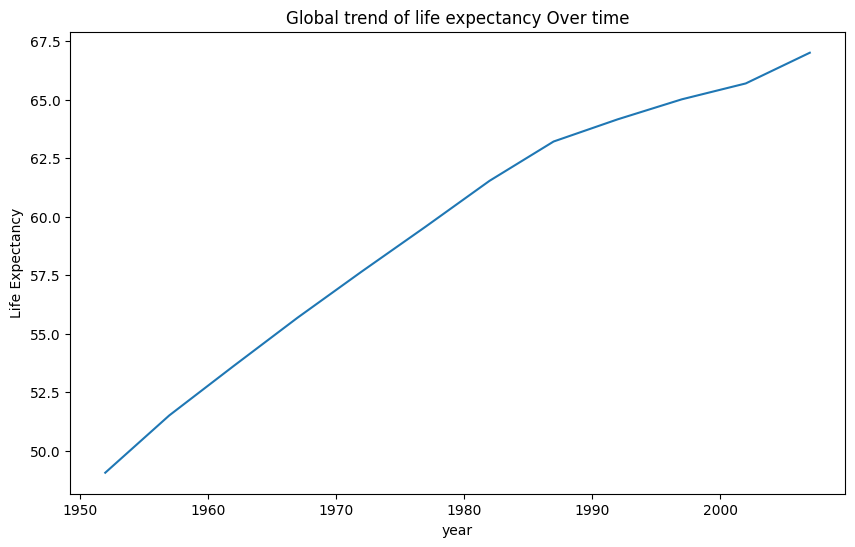

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(x=global_life_exp.index, y=global_life_exp.values)
plt.title("Global trend of life expectancy Over time")
plt.xlabel("year")
plt.ylabel("Life Expectancy")
plt.show()

###  Country with highest increase in GDP per capita

In [56]:
gdp_diff = df.groupby('country')['gdp_cap'].agg(['first', 'last'])
print(gdp_diff)

                          first          last
country                                      
Afghanistan          779.445314    974.580338
Albania             1601.056136   5937.029526
Algeria             2449.008185   6223.367465
Angola              3520.610273   4797.231267
Argentina           5911.315053  12779.379640
...                         ...           ...
Vietnam              605.066492   2441.576404
West Bank and Gaza  1515.592329   3025.349798
Yemen, Rep.          781.717576   2280.769906
Zambia              1147.388831   1271.211593
Zimbabwe             406.884115    469.709298

[142 rows x 2 columns]


In [42]:
gdp_diff['increase'] = gdp_diff['last'] - gdp_diff['first']
gdp_diff

,first,last,increase
country,,,
Afghanistan,779.445314,974.580338,195.135024
Albania,1601.056136,5937.029526,4335.973390
Algeria,2449.008185,6223.367465,3774.359280
Angola,3520.610273,4797.231267,1276.620994
Argentina,5911.315053,12779.379640,6868.064587
...,...,...,...
Vietnam,605.066492,2441.576404,1836.509912
West Bank and Gaza,1515.592329,3025.349798,1509.757469
"Yemen, Rep.",781.717576,2280.769906,1499.052330


In [ ]:
top_increase = gdp_diff['increase'].idxmax()
print(f"Country with highest GDP per capita increase: {top_increase}")

Country with highest GDP per capita increase: Singapore


### Average GDP per capita and life expectancy per continent

In [57]:
continent_stats = df.groupby('continent').agg({'gdp_cap':'mean','life_exp':'mean'})
print(continent_stats)


                gdp_cap   life_exp
continent                         
Africa      2193.754578  48.865330
Americas    7136.110356  64.658737
Asia        7902.150428  60.064903
Europe     14469.475533  71.903686
Oceania    18621.609223  74.326208


### Top 5 most populous countries in the most recent year

In [61]:
latest_year = df['year'].max()
pop_df = df[df['year'] == latest_year].sort_values(by = 'population', ascending=False).head(5)
print(pop_df[['country', 'population']])

            country  population
299           China  1318683096
707           India  1110396331
1619  United States   301139947
719       Indonesia   223547000
179          Brazil   190010647


### Average GDP per capita by continent

In [66]:
avg_gdp_continet = df.groupby('continent')['gdp_cap'].mean().reset_index()
print(avg_gdp_continet)

  continent       gdp_cap
0    Africa   2193.754578
1  Americas   7136.110356
2      Asia   7902.150428
3    Europe  14469.475533
4   Oceania  18621.609223


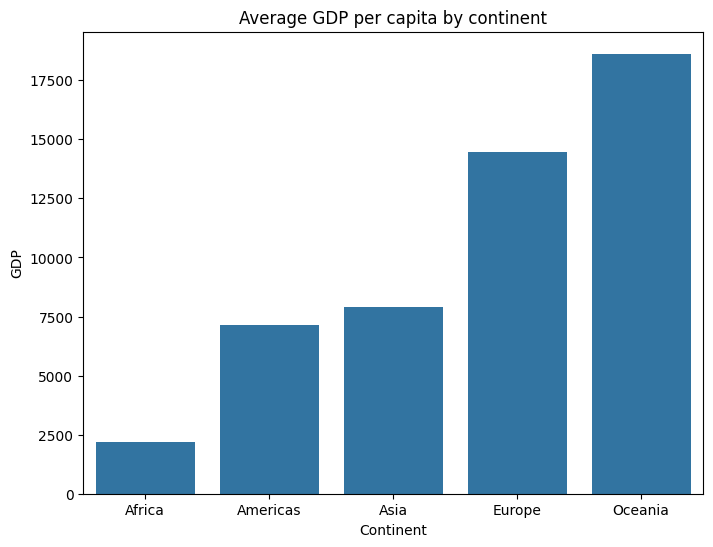

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(x='continent', y='gdp_cap', data=avg_gdp_continet)
plt.title("Average GDP per capita by continent")
plt.xlabel("Continent")
plt.ylabel("GDP")
plt.show()

## Life expectancy trend for India

In [72]:
df_india = df[df['country'] == 'India']
df_india

,country,year,population,continent,life_exp,gdp_cap,total_gdp,gdp_category,life_stage
696,India,1952,372000000,Asia,37.373,546.565749,2.033225e+11,Medium,Low
697,India,1957,409000000,Asia,40.249,590.061996,2.413354e+11,Medium,Low
698,India,1962,454000000,Asia,43.605,658.347151,2.988896e+11,Medium,Low
699,India,1967,506000000,Asia,47.193,700.770611,3.545899e+11,Medium,Low
700,India,1972,567000000,Asia,50.651,724.032527,4.105264e+11,Medium,Medium
701,India,1977,634000000,Asia,54.208,813.337323,5.156559e+11,Medium,Medium
702,India,1982,708000000,Asia,56.596,855.723538,6.058523e+11,Medium,Medium
703,India,1987,788000000,Asia,58.553,976.512676,7.694920e+11,Medium,Medium
704,India,1992,872000000,Asia,60.223,1164.406809,1.015363e+12,Medium,Medium
705,India,1997,959000000,Asia,61.765,1458.817442,1.399006e+12,Medium,Medium


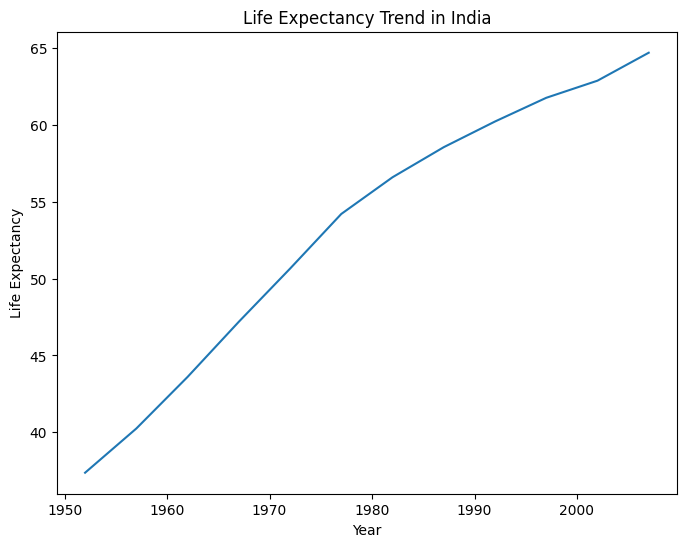

In [73]:
plt.figure(figsize=(8,6))
sns.lineplot(x='year', y='life_exp', data=df_india)
plt.title("Life Expectancy Trend in India")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.show()